# Capstone project

In [2]:
from bs4 import BeautifulSoup
import requests  
import pandas as pd
import numpy as np

---

##  1. Importing the first Dataset from Wikipedia

---

In [3]:
url1='https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods'
data1  = requests.get(url1).text
soup = BeautifulSoup(data1,"html5lib")
tables = soup.find_all('table')

In [4]:
Toronto_Neigh_data_1 = pd.DataFrame(columns=["Neighborhood", "Population", "Density of populatiion km2", "Avarage income"])
for row in tables[1].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        rank = col[0].text
        country = col[3].text
        density = col[5].text
        income = col[7].text

        Toronto_Neigh_data_1 = Toronto_Neigh_data_1.append({"Neighborhood":rank, "Population":country,"Density of populatiion km2":density, "Avarage Income":income}, ignore_index=True)

Toronto_Neigh_data_1.drop(['Avarage income'], axis=1)

,Neighborhood,Population,Density of populatiion km2,Avarage Income
0,Crescent Town\n,"8,157\n","20,393\n","23,021\n"
1,Governor's Bridge/Bennington Heights\n,"2,112\n",1129\n,"129,904\n"
2,Leaside\n,"13,876\n",4938\n,"82,670\n"
3,O'Connor–Parkview\n,"17,740\n",3591\n,"33,517\n"
4,Old East York\n,"52,220\n",6577\n,"33,172\n"
5,Thorncliffe Park\n,"17,949\n",5809\n,"25,340\n"


In [5]:
Toronto_Neigh_data_2 = pd.DataFrame(columns=["Neighborhood", "Population", "Density of populatiion km2", "Avarage income"])
for row in tables[2].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        rank = col[0].text
        country = col[3].text
        density = col[5].text
        income = col[7].text

        Toronto_Neigh_data_2 = Toronto_Neigh_data_2.append({"Neighborhood":rank, "Population":country,"Density of populatiion km2":density, "Avarage Income":income}, ignore_index=True)

Toronto_Neigh_data_2.drop(['Avarage income'], axis=1)

,Neighborhood,Population,Density of populatiion km2,Avarage Income
0,Alderwood\n,"11,656\n",2360\n,"35,239\n"
1,Centennial\n,"12,565\n",2544\n,"34,867\n"
2,Clairville\n,"8,506\n",1268\n,"26,610\n"
3,Eatonville\n,"19,131\n",1699\n,"36,206\n"
4,Humber Bay Shores\n,"10,775\n",7588\n,"39,186\n"
5,Humber Heights\n,"4,674\n",2766\n,"39,738\n"
6,Humberwood\n,"7,319\n",421\n,"29,576\n"
7,Humber Valley Village\n,"14,453\n",2652\n,"80,618\n"
8,Islington – Six Points\n,"16,508\n",4106\n,"43,570\n"
9,Kingsview Village\n,"16,254\n",4013\n,"32,004\n"


In [6]:
Toronto_Neigh_data_3 = pd.DataFrame(columns=["Neighborhood", "Population", "Density of populatiion km2", "Avarage income"])
for row in tables[5].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        rank = col[0].text
        country = col[3].text
        density = col[5].text
        income = col[7].text

        Toronto_Neigh_data_3 = Toronto_Neigh_data_3.append({"Neighborhood":rank, "Population":country,"Density of populatiion km2":density, "Avarage Income":income}, ignore_index=True)

Toronto_Neigh_data_3.drop(['Avarage income'], axis=1)

,Neighborhood,Population,Density of populatiion km2,Avarage Income
0,Toronto CMA Average\n,"5,113,149\n",866\n,"40,704\n"
1,Agincourt\n,"44,577\n",3580\n,"25,750\n"
2,Alexandra Park\n,"4,355\n","13,609\n","19,687\n"
3,Allenby\n,"2,513\n",4333\n,"245,592\n"
4,Amesbury\n,"17,318\n","4,934\n","27,546\n"
...,...,...,...,...
151,Woburn\n,"48,507\n",3636\n,"26,190\n"
152,Wychwood\n,"4,182\n",6150\n,"53,613\n"
153,York Mills\n,"17,564\n",2409\n,"92,099\n"
154,York University Heights\n,"26,140\n",1979\n,"24,432\n"


### Cleaning the dataset

In [7]:
Toronto_Neigh_data= pd.concat([Toronto_Neigh_data_1, Toronto_Neigh_data_2,Toronto_Neigh_data_3])
Toronto_Neigh_data=Toronto_Neigh_data.drop(['Avarage income'], axis=1)
Toronto_Neigh_data.sort_values(by=['Neighborhood'], ascending=True)
Toronto_Neigh_data.reset_index(drop=True, inplace=True)

In [8]:
Toronto_Neigh_data['Neighborhood'] = Toronto_Neigh_data['Neighborhood'].replace(r'\s+|\\n', ' ', regex=True) 
Toronto_Neigh_data['Population'] = Toronto_Neigh_data['Population'].replace(r'\s+|\\n', ' ', regex=True)
Toronto_Neigh_data['Density of populatiion km2'] = Toronto_Neigh_data['Density of populatiion km2'].replace(r'\s+|\\n', ' ', regex=True)
Toronto_Neigh_data['Avarage Income'] = Toronto_Neigh_data['Avarage Income'].replace(r'\s+|\\n', ' ', regex=True)

In [9]:
indexNames = Toronto_Neigh_data[Toronto_Neigh_data['Neighborhood'] == ' ' ].index
Toronto_Neigh_data.drop(indexNames , inplace=True)
Toronto_Neigh_data=Toronto_Neigh_data.sort_values(by=['Neighborhood'], ascending=True)

In [10]:
Toronto_Neigh_data["Density of populatiion km2"] = Toronto_Neigh_data["Density of populatiion km2"].str.replace(',','')
Toronto_Neigh_data["Density of populatiion km2"] = Toronto_Neigh_data.loc[:, ('Density of populatiion km2')].astype(float)

Toronto_Neigh_data["Population"] = Toronto_Neigh_data["Population"].str.replace(',','')
Toronto_Neigh_data["Population"] = Toronto_Neigh_data.loc[:, ('Population')].astype(float)

Toronto_Neigh_data["Avarage Income"] = Toronto_Neigh_data["Avarage Income"].str.replace(',','')
Toronto_Neigh_data["Avarage Income"] = Toronto_Neigh_data.loc[:, ('Avarage Income')].astype(float)

### Result table of the ETL 

In [11]:
Toronto_Neigh_data

,Neighborhood,Population,Density of populatiion km2,Avarage Income
22,Agincourt,44577.0,3580.0,25750.0
6,Alderwood,11656.0,2360.0,35239.0
23,Alexandra Park,4355.0,13609.0,19687.0
24,Allenby,2513.0,4333.0,245592.0
25,Amesbury,17318.0,4934.0,27546.0
...,...,...,...,...
172,Woburn,48507.0,3636.0,26190.0
173,Wychwood,4182.0,6150.0,53613.0
174,York Mills,17564.0,2409.0,92099.0
175,York University Heights,26140.0,1979.0,24432.0


---

## 2. Importing the second dataset from Toronto Open Data

---

In [66]:
import urllib.request

url = 'https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/6ab1ffae-a6ef-4d39-b943-4f6670fe58fa?format=csv&projection=4326'
filename = 'shootings-firearm-discharges.csv'
urllib.request.urlretrieve(url, filename)

('shootings-firearm-discharges.csv',
 <http.client.HTTPMessage at 0x27176a9d188>)

In [67]:
cust_df = pd.read_csv('shootings-firearm-discharges.csv')

In [68]:
cust_df[['A', 'B']] = cust_df['geometry'].str.split('(', 1, expand=True)
del cust_df['geometry']
del cust_df['A']
cust_df[['C', 'D']] = cust_df['B'].str.split(')', 1, expand=True)
del cust_df['B']
del cust_df['D']
cust_df[['Long', 'Lat']] = cust_df['C'].str.split(',', 1, expand=True)
cust_df[['Neighborhood', 'Neighborhood_id']] = cust_df['Neighbourhood'].str.split('(', 1, expand=True)
cust_df[['CDN', 'Scarto']] = cust_df['Neighborhood_id'].str.split(')', 1, expand=True)
del cust_df['Hood_ID']
del cust_df['Neighborhood_id']
del cust_df['Scarto']
del cust_df['C']
del cust_df['Neighbourhood']

In [69]:
cust_df

,_id,Event_Unique_ID,Occurrence_Date,Occurrence_year,Month,Day_of_week,Occurrence_Hour,Time_Range,Division,Death,Injuries,ObjectId,Long,Lat,Neighborhood,CDN
0,1,GO-2005901779,2005-02-06T00:00:00,2005,February,Sunday,23,Evening,D43,0,0,1,-79.21887335,43.74318039,Scarborough Village,139
1,2,GO-2005928264,2005-02-07T00:00:00,2005,February,Monday,21,Evening,D32,0,1,2,-79.41553623,43.77976942,Willowdale West,37
2,3,GO-2005832576,2005-02-09T00:00:00,2005,February,Wednesday,20,Evening,D51,0,1,3,-79.37099208,43.65829436,Moss Park,73
3,4,GO-2005951634,2005-02-11T00:00:00,2005,February,Friday,17,Afternoon,D33,1,0,4,-79.38581514,43.66081576,Bay Street Corridor,76
4,5,GO-2005901792,2005-02-11T00:00:00,2005,February,Friday,0,Night,D42,0,1,5,-79.1947012,43.76201197,West Hill,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4852,4853,GO-2019935476,2019-05-19T00:00:00,2019,May,Sunday,21,Evening,D43,0,0,4853,-79.19943219,43.76544497,West Hill,136
4853,4854,GO-2019916742,2019-05-20T00:00:00,2019,May,Monday,1,Night,D23,0,1,4854,-79.59033164,43.73401277,West Humber-Clairville,1
4854,4855,GO-2019926617,2019-05-21T00:00:00,2019,May,Tuesday,14,Afternoon,D42,0,1,4855,-79.24961963,43.78223693,Woburn,137
4855,4856,GO-2019929534,2019-05-21T00:00:00,2019,May,Tuesday,22,Evening,D22,0,0,4856,-79.56905084,43.63400778,Markland Wood,12


In [70]:
cust_df.groupby('Neighborhood').count()

,_id,Event_Unique_ID,Occurrence_Date,Occurrence_year,Month,Day_of_week,Occurrence_Hour,Time_Range,Division,Death,Injuries,ObjectId,Long,Lat,CDN
Neighborhood,,,,,,,,,,,,,,,
Agincourt North,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
Agincourt South-Malvern West,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
Alderwood,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Annex,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Banbury-Don Mills,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wychwood,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Yonge-Eglinton,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Yonge-St.Clair,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


#### Selecting year =2020

In [71]:
cust_df = cust_df[cust_df['Occurrence_year'] == 2020]

In [72]:
cust_df

,_id,Event_Unique_ID,Occurrence_Date,Occurrence_year,Month,Day_of_week,Occurrence_Hour,Time_Range,Division,Death,Injuries,ObjectId,Long,Lat,Neighborhood,CDN
4189,4190,GO-20205967,2020-01-01T00:00:00,2020,January,Wednesday,22,Evening,D51,1,1,4190,-79.35864726,43.66241529,Regent Park,72
4190,4191,GO-202012411,2020-01-02T00:00:00,2020,January,Thursday,20,Evening,D32,0,0,4191,-79.40921511,43.79363021,Newtonbrook East,50
4191,4192,GO-202032177,2020-01-05T00:00:00,2020,January,Sunday,21,Evening,D12,0,0,4192,-79.48208041,43.72020084,Maple Leaf,29
4192,4193,GO-202028179,2020-01-05T00:00:00,2020,January,Sunday,4,Night,D23,0,0,4193,-79.55242258,43.74259998,Thistletown-Beaumond Heights,3
4193,4194,GO-202042782,2020-01-07T00:00:00,2020,January,Tuesday,12,Afternoon,D32,0,1,4194,-79.45096908,43.72277473,Yorkdale-Glen Park,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4753,4754,GO-20201401425,2020-07-27T00:00:00,2020,July,Monday,23,Evening,D51,0,1,4754,-79.35864726,43.66241529,Regent Park,72
4754,4755,GO-20201394919,2020-07-27T00:00:00,2020,July,Monday,3,Night,D51,0,1,4755,-79.3657162,43.65533986,Moss Park,73
4755,4756,GO-20201394899,2020-07-27T00:00:00,2020,July,Monday,3,Night,D43,0,0,4756,-79.19330085,43.78534276,Morningside,135
4756,4757,GO-20201411020,2020-07-28T00:00:00,2020,July,Tuesday,12,Afternoon,D12,0,0,4757,-79.53358776,43.70778746,Weston,113


#### Selecting the important features for the model

In [73]:
cust_df_fil =  cust_df[['Occurrence_year','Neighborhood','Long','Lat','CDN','Death','Injuries']]

In [74]:
cust_df_fil

,Occurrence_year,Neighborhood,Long,Lat,CDN,Death,Injuries
4189,2020,Regent Park,-79.35864726,43.66241529,72,1,1
4190,2020,Newtonbrook East,-79.40921511,43.79363021,50,0,0
4191,2020,Maple Leaf,-79.48208041,43.72020084,29,0,0
4192,2020,Thistletown-Beaumond Heights,-79.55242258,43.74259998,3,0,0
4193,2020,Yorkdale-Glen Park,-79.45096908,43.72277473,31,0,1
...,...,...,...,...,...,...,...
4753,2020,Regent Park,-79.35864726,43.66241529,72,0,1
4754,2020,Moss Park,-79.3657162,43.65533986,73,0,1
4755,2020,Morningside,-79.19330085,43.78534276,135,0,0
4756,2020,Weston,-79.53358776,43.70778746,113,0,0


In [75]:
cust_df_fil["Long"] = cust_df_fil.loc[:, ('Long')].astype(float)
cust_df_fil["Lat"] = cust_df_fil.loc[:, ('Lat')].astype(float)

C:\Users\Lorenzo\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Lorenzo\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Grouping the data by neighborhood

In [76]:
cust_df_fil.groupby('Neighborhood').mean()

,Occurrence_year,Long,Lat,Death,Injuries
Neighborhood,,,,,
Agincourt North,2020.0,-79.264930,43.811456,0.000000,0.000000
Agincourt South-Malvern West,2020.0,-79.270380,43.785573,1.000000,1.000000
Banbury-Don Mills,2020.0,-79.342430,43.727397,0.000000,0.000000
Bay Street Corridor,2020.0,-79.379932,43.654066,0.200000,0.200000
Bayview Village,2020.0,-79.370881,43.769477,0.000000,0.000000
...,...,...,...,...,...
Woburn,2020.0,-79.218362,43.763593,0.066667,0.266667
Wychwood,2020.0,-79.427429,43.677130,0.500000,0.000000
Yonge-Eglinton,2020.0,-79.396821,43.699333,0.000000,1.000000


In [78]:
rep = cust_df_fil.groupby('Neighborhood').mean()
rep_lat  = rep['Lat']
rep_lon  = rep['Long']

In [48]:
rep

,Occurrence_year,Long,Lat,Death,Injuries
Neighbourhood,,,,,
Agincourt North (129),2020.0,-79.264930,43.811456,0.000000,0.000000
Agincourt South-Malvern West (128),2020.0,-79.270380,43.785573,1.000000,1.000000
Banbury-Don Mills (42),2020.0,-79.342430,43.727397,0.000000,0.000000
Bay Street Corridor (76),2020.0,-79.379932,43.654066,0.200000,0.200000
Bayview Village (52),2020.0,-79.370881,43.769477,0.000000,0.000000
...,...,...,...,...,...
Woburn (137),2020.0,-79.218362,43.763593,0.066667,0.266667
Wychwood (94),2020.0,-79.427429,43.677130,0.500000,0.000000
Yonge-Eglinton (100),2020.0,-79.396821,43.699333,0.000000,1.000000


In [79]:
cust_1 = cust_df_fil.groupby('Neighborhood').count()

In [80]:
cust_1

,Occurrence_year,Long,Lat,CDN,Death,Injuries
Neighborhood,,,,,,
Agincourt North,2,2,2,2,2,2
Agincourt South-Malvern West,1,1,1,1,1,1
Banbury-Don Mills,2,2,2,2,2,2
Bay Street Corridor,5,5,5,5,5,5
Bayview Village,1,1,1,1,1,1
...,...,...,...,...,...,...
Woburn,15,15,15,15,15,15
Wychwood,2,2,2,2,2,2
Yonge-Eglinton,1,1,1,1,1,1


In [81]:
cust_1 = cust_1.rename(columns={"Injuries" : "Count shootings"})
del cust_1['Occurrence_year']
del cust_1['Long']
del cust_1['Lat']
del cust_1['CDN']
del cust_1['Death']

In [82]:
cust_1 = cust_1.reset_index()

In [83]:
cust_1

,Neighborhood,Count shootings
0,Agincourt North,2
1,Agincourt South-Malvern West,1
2,Banbury-Don Mills,2
3,Bay Street Corridor,5
4,Bayview Village,1
...,...,...
95,Woburn,15
96,Wychwood,2
97,Yonge-Eglinton,1
98,York University Heights,12


In [84]:
df_toronto_crime = cust_df_fil.groupby('Neighborhood').mean()
df_toronto_crime=df_toronto_crime.reset_index()
df_toronto_crime_1=pd.merge(df_toronto_crime, cust_1, on='Neighborhood', how='outer')

In [85]:
df_toronto_crime = df_toronto_crime_1
df_toronto_crime

,Neighborhood,Occurrence_year,Long,Lat,Death,Injuries,Count shootings
0,Agincourt North,2020.0,-79.264930,43.811456,0.000000,0.000000,2
1,Agincourt South-Malvern West,2020.0,-79.270380,43.785573,1.000000,1.000000,1
2,Banbury-Don Mills,2020.0,-79.342430,43.727397,0.000000,0.000000,2
3,Bay Street Corridor,2020.0,-79.379932,43.654066,0.200000,0.200000,5
4,Bayview Village,2020.0,-79.370881,43.769477,0.000000,0.000000,1
...,...,...,...,...,...,...,...
95,Woburn,2020.0,-79.218362,43.763593,0.066667,0.266667,15
96,Wychwood,2020.0,-79.427429,43.677130,0.500000,0.000000,2
97,Yonge-Eglinton,2020.0,-79.396821,43.699333,0.000000,1.000000,1
98,York University Heights,2020.0,-79.491501,43.763035,0.083333,0.166667,12


#### Preparing the data for the alghoritm (df_tor_data) and the table with longitude and latitude (rep)

In [86]:
df_tor_data = df_toronto_crime
del df_tor_data ['Occurrence_year']
del df_tor_data ['Long']
del df_tor_data ['Lat']
df_tor_data

,Neighborhood,Death,Injuries,Count shootings
0,Agincourt North,0.000000,0.000000,2
1,Agincourt South-Malvern West,1.000000,1.000000,1
2,Banbury-Don Mills,0.000000,0.000000,2
3,Bay Street Corridor,0.200000,0.200000,5
4,Bayview Village,0.000000,0.000000,1
...,...,...,...,...
95,Woburn,0.066667,0.266667,15
96,Wychwood,0.500000,0.000000,2
97,Yonge-Eglinton,0.000000,1.000000,1
98,York University Heights,0.083333,0.166667,12


In [87]:
df_toronto_crime

,Neighborhood,Death,Injuries,Count shootings
0,Agincourt North,0.000000,0.000000,2
1,Agincourt South-Malvern West,1.000000,1.000000,1
2,Banbury-Don Mills,0.000000,0.000000,2
3,Bay Street Corridor,0.200000,0.200000,5
4,Bayview Village,0.000000,0.000000,1
...,...,...,...,...
95,Woburn,0.066667,0.266667,15
96,Wychwood,0.500000,0.000000,2
97,Yonge-Eglinton,0.000000,1.000000,1
98,York University Heights,0.083333,0.166667,12


In [88]:
df_tor_data

,Neighborhood,Death,Injuries,Count shootings
0,Agincourt North,0.000000,0.000000,2
1,Agincourt South-Malvern West,1.000000,1.000000,1
2,Banbury-Don Mills,0.000000,0.000000,2
3,Bay Street Corridor,0.200000,0.200000,5
4,Bayview Village,0.000000,0.000000,1
...,...,...,...,...
95,Woburn,0.066667,0.266667,15
96,Wychwood,0.500000,0.000000,2
97,Yonge-Eglinton,0.000000,1.000000,1
98,York University Heights,0.083333,0.166667,12


In [89]:
rep

,Occurrence_year,Long,Lat,Death,Injuries
Neighborhood,,,,,
Agincourt North,2020.0,-79.264930,43.811456,0.000000,0.000000
Agincourt South-Malvern West,2020.0,-79.270380,43.785573,1.000000,1.000000
Banbury-Don Mills,2020.0,-79.342430,43.727397,0.000000,0.000000
Bay Street Corridor,2020.0,-79.379932,43.654066,0.200000,0.200000
Bayview Village,2020.0,-79.370881,43.769477,0.000000,0.000000
...,...,...,...,...,...
Woburn,2020.0,-79.218362,43.763593,0.066667,0.266667
Wychwood,2020.0,-79.427429,43.677130,0.500000,0.000000
Yonge-Eglinton,2020.0,-79.396821,43.699333,0.000000,1.000000


---

## 3. Joining the table from Wikipedia and Toronto Opend Data

---

In [92]:
prova=pd.merge(df_tor_data,Toronto_Neigh_data,on='Neighborhood',how='left')

In [93]:
prova

,Neighborhood,Death,Injuries,Count shootings,Population,Density of populatiion km2,Avarage Income
0,Agincourt North,0.000000,0.000000,2,NaN,NaN,NaN
1,Agincourt South-Malvern West,1.000000,1.000000,1,NaN,NaN,NaN
2,Banbury-Don Mills,0.000000,0.000000,2,NaN,NaN,NaN
3,Bay Street Corridor,0.200000,0.200000,5,4787.0,43518.0,40598.0
4,Bayview Village,0.000000,0.000000,1,12280.0,2966.0,46752.0
...,...,...,...,...,...,...,...
95,Woburn,0.066667,0.266667,15,48507.0,3636.0,26190.0
96,Wychwood,0.500000,0.000000,2,4182.0,6150.0,53613.0
97,Yonge-Eglinton,0.000000,1.000000,1,NaN,NaN,NaN
98,York University Heights,0.083333,0.166667,12,26140.0,1979.0,24432.0


In [94]:
df_tor_data = prova

---

# 4. Data analysis

---

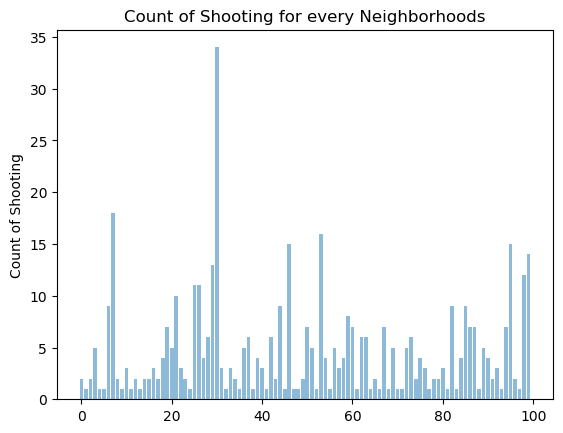

In [96]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = df_tor_data['Neighborhood']
y_pos = np.arange(len(objects))

performance = df_tor_data['Count shootings']

plt.bar(y_pos, performance, align='center', alpha=0.5)

plt.ylabel('Count of Shooting')
plt.title('Count of Shooting for every Neighborhoods')

plt.show()

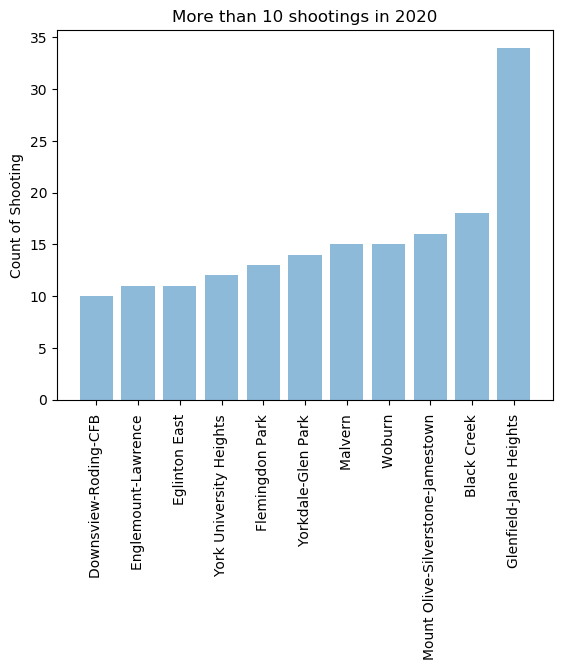

In [97]:
sorted_df = df_tor_data.sort_values(by='Count shootings')
sorted_df[sorted_df['Count shootings']>= 10]
#cust_df = cust_df[cust_df['Occurrence_year'] == 2020]
sort_count=sorted_df[sorted_df['Count shootings']>= 10]

objects = sort_count['Neighborhood']
y_pos = np.arange(len(objects))

performance = sort_count['Count shootings']

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects,rotation=90)
plt.ylabel('Count of Shooting')
plt.title('More than 10 shootings in 2020')

plt.show()

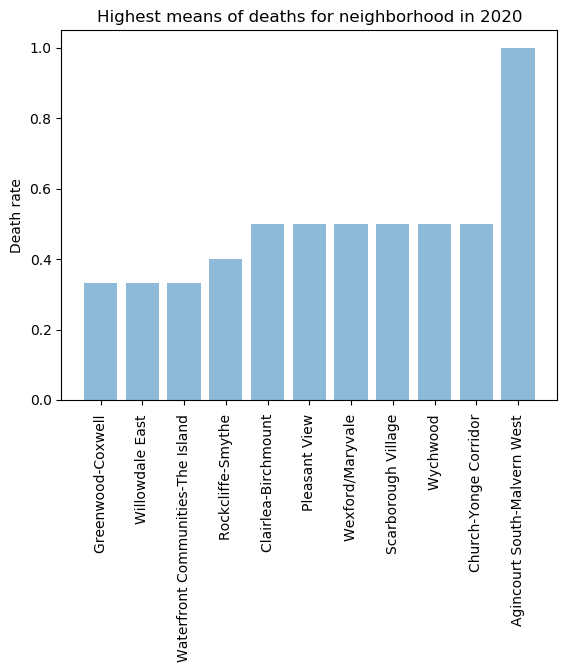

In [98]:
sorted_df = df_tor_data.sort_values(by='Death')
sorted_df[sorted_df['Death']>= 0.5]
#cust_df = cust_df[cust_df['Occurrence_year'] == 2020]
sort_count=sorted_df[sorted_df['Death']>= 0.3]

objects = sort_count['Neighborhood']
y_pos = np.arange(len(objects))

performance = sort_count['Death']

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects,rotation=90)
plt.ylabel('Death rate')
plt.title('Highest means of deaths for neighborhood in 2020')

plt.show()

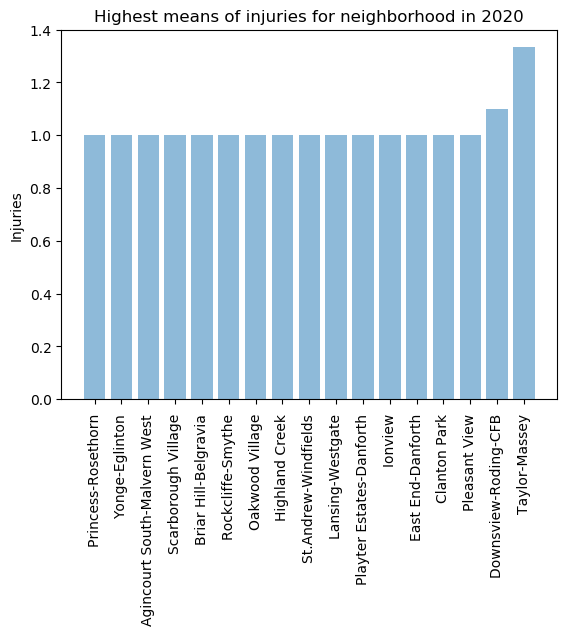

In [74]:
sorted_df = df_tor_data.sort_values(by='Injuries')

#cust_df = cust_df[cust_df['Occurrence_year'] == 2020]
sort_count=sorted_df[sorted_df['Injuries']>= 1]

objects = sort_count['Neighbourhood']
y_pos = np.arange(len(objects))

performance = sort_count['Injuries']

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects,rotation=90)
plt.ylabel('Injuries')
plt.title('Highest means of injuries for neighborhood in 2020')

plt.show()

#### Here I have substitue the NAN values with the mean of the values in each colums

In [99]:
from sklearn.impute import SimpleImputer

In [100]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # il primo elemento ti dice che tipo di errore correggere, il secondo come 
imputer.fit(sorted_df[['Population','Density of populatiion km2','Avarage Income']]) # opera la trasformazione (ma non fa l'update)
sorted_df[['Population','Density of populatiion km2','Avarage Income']] = imputer.transform(sorted_df[['Population','Density of populatiion km2','Avarage Income']]) # per modificare la matrice di partenza

In [101]:
sorted_df

,Neighborhood,Death,Injuries,Count shootings,Population,Density of populatiion km2,Avarage Income
0,Agincourt North,0.0,0.000000,2,19253.108108,5937.0,31652.918919
64,Playter Estates-Danforth,0.0,1.000000,1,19253.108108,5937.0,31652.918919
63,Pelmo Park-Humberlea,0.0,0.166667,6,19253.108108,5937.0,31652.918919
62,Parkwoods-Donalda,0.0,0.333333,6,19253.108108,5937.0,31652.918919
61,Old East York,0.0,0.000000,1,52220.000000,6577.0,33172.000000
...,...,...,...,...,...,...,...
91,Wexford/Maryvale,0.5,0.000000,2,19253.108108,5937.0,31652.918919
74,Scarborough Village,0.5,1.000000,2,12796.000000,6303.0,24413.000000
96,Wychwood,0.5,0.000000,2,4182.000000,6150.0,53613.000000
14,Church-Yonge Corridor,0.5,0.500000,2,19253.108108,5937.0,31652.918919


In [102]:
import seaborn as sns
%matplotlib inline

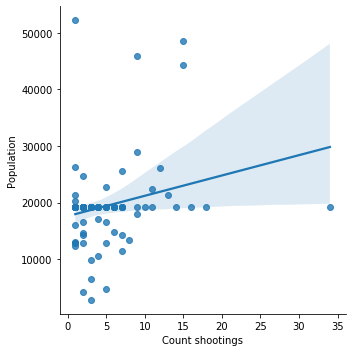

In [105]:
vis1 = sns.lmplot(data=sorted_df, x='Count shootings', y='Population')

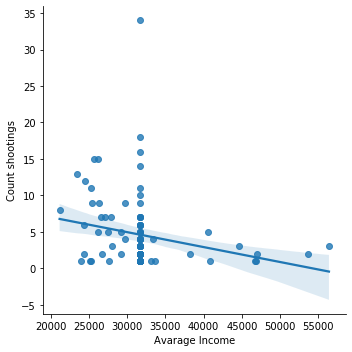

In [107]:
vis1 = sns.lmplot(data=sorted_df, y='Count shootings', x='Avarage Income')

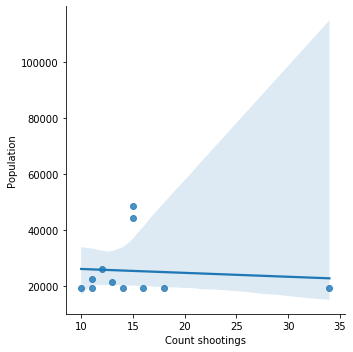

In [115]:
sort3=sorted_df[sorted_df['Count shootings']>= 10]
vis1 = sns.lmplot(data=sort3, x='Count shootings', y='Population')

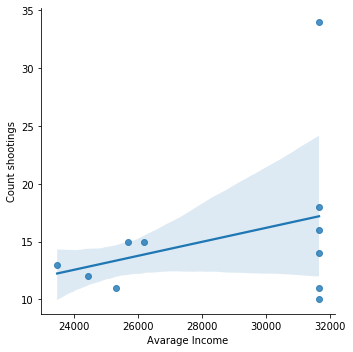

In [112]:
sort3=sorted_df[sorted_df['Count shootings']>= 10]
vis3 = sns.lmplot(data=sort3, y='Count shootings', x='Avarage Income')

---

# 5. Creation and training the model

---

In [122]:
df_tor_data

,Neighborhood,Death,Injuries,Count shootings,Population,Density of populatiion km2,Avarage Income
0,Agincourt North,0.000000,0.000000,2,NaN,NaN,NaN
1,Agincourt South-Malvern West,1.000000,1.000000,1,NaN,NaN,NaN
2,Banbury-Don Mills,0.000000,0.000000,2,NaN,NaN,NaN
3,Bay Street Corridor,0.200000,0.200000,5,4787.0,43518.0,40598.0
4,Bayview Village,0.000000,0.000000,1,12280.0,2966.0,46752.0
...,...,...,...,...,...,...,...
95,Woburn,0.066667,0.266667,15,48507.0,3636.0,26190.0
96,Wychwood,0.500000,0.000000,2,4182.0,6150.0,53613.0
97,Yonge-Eglinton,0.000000,1.000000,1,NaN,NaN,NaN
98,York University Heights,0.083333,0.166667,12,26140.0,1979.0,24432.0


In [123]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # il primo elemento ti dice che tipo di errore correggere, il secondo come 
imputer.fit(df_tor_data[['Population','Density of populatiion km2','Avarage Income']]) # opera la trasformazione (ma non fa l'update)
df_tor_data[['Population','Density of populatiion km2','Avarage Income']] = imputer.transform(df_tor_data[['Population','Density of populatiion km2','Avarage Income']]) # per modificare la matrice di partenza

In [124]:
df_tor_data

,Neighborhood,Death,Injuries,Count shootings,Population,Density of populatiion km2,Avarage Income
0,Agincourt North,0.000000,0.000000,2,19253.108108,5937.0,31652.918919
1,Agincourt South-Malvern West,1.000000,1.000000,1,19253.108108,5937.0,31652.918919
2,Banbury-Don Mills,0.000000,0.000000,2,19253.108108,5937.0,31652.918919
3,Bay Street Corridor,0.200000,0.200000,5,4787.000000,43518.0,40598.000000
4,Bayview Village,0.000000,0.000000,1,12280.000000,2966.0,46752.000000
...,...,...,...,...,...,...,...
95,Woburn,0.066667,0.266667,15,48507.000000,3636.0,26190.000000
96,Wychwood,0.500000,0.000000,2,4182.000000,6150.0,53613.000000
97,Yonge-Eglinton,0.000000,1.000000,1,19253.108108,5937.0,31652.918919
98,York University Heights,0.083333,0.166667,12,26140.000000,1979.0,24432.000000


In [116]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [140]:
ct = ColumnTransformer(transformers=[('encode', OneHotEncoder(sparse=False),[0])], remainder='passthrough') # [0] colonna della tabella in cui fare la trasformazione
dati=np.array(ct.fit_transform(df_tor_data))

In [141]:
dati

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.92531081e+04, 5.93700000e+03, 3.16529189e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.92531081e+04, 5.93700000e+03, 3.16529189e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.92531081e+04, 5.93700000e+03, 3.16529189e+04],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.92531081e+04, 5.93700000e+03, 3.16529189e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.61400000e+04, 1.97900000e+03, 2.44320000e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.92531081e+04, 5.93700000e+03, 3.16529189e+04]])

In [142]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [143]:
dati[:,102:103] = sc.fit_transform(dati[:,102:103])

In [144]:
dati[:,103:104] = sc.fit_transform(dati[:,103:104])

In [145]:
dati[:,104:105] = sc.fit_transform(dati[:,104:105])

In [146]:
dati[:,105:106] = sc.fit_transform(dati[:,105:106])

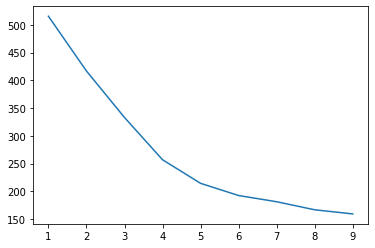

In [147]:
from sklearn.cluster import KMeans
WCCS=[]
for i  in range(1,10):  # PROVO 10 CLUSTER
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42) # con kmeans ++ si evita la trappola di inizializzazione
    kmeans.fit(dati)
    WCCS.append(kmeans.inertia_)
    
    
plt.plot(range(1,10),WCCS)

In [148]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(dati)
y_kmeans

array([0, 0, 0, 1, 5, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4,
       0, 0, 0, 4, 4, 0, 0, 4, 2, 0, 5, 5, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 0, 0, 5, 4, 0, 0, 4, 0, 0, 0, 5, 0, 4, 4, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 4, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 5, 0, 4, 4])

---

# 6. Plotting the result

---

In [149]:
import folium 

import matplotlib.cm as cm

import matplotlib.colors as colors

import json 

from geopy.geocoders import Nominatim 

In [150]:
df_tor_data.insert(0, 'Cluster Labels', y_kmeans)

In [151]:
df_tor_data

,Cluster Labels,Neighborhood,Death,Injuries,Count shootings,Population,Density of populatiion km2,Avarage Income
0,0,Agincourt North,0.000000,0.000000,2,19253.108108,5937.0,31652.918919
1,0,Agincourt South-Malvern West,1.000000,1.000000,1,19253.108108,5937.0,31652.918919
2,0,Banbury-Don Mills,0.000000,0.000000,2,19253.108108,5937.0,31652.918919
3,1,Bay Street Corridor,0.200000,0.200000,5,4787.000000,43518.0,40598.000000
4,5,Bayview Village,0.000000,0.000000,1,12280.000000,2966.0,46752.000000
...,...,...,...,...,...,...,...,...
95,3,Woburn,0.066667,0.266667,15,48507.000000,3636.0,26190.000000
96,5,Wychwood,0.500000,0.000000,2,4182.000000,6150.0,53613.000000
97,0,Yonge-Eglinton,0.000000,1.000000,1,19253.108108,5937.0,31652.918919
98,4,York University Heights,0.083333,0.166667,12,26140.000000,1979.0,24432.000000


In [152]:
rep

,Occurrence_year,Long,Lat,Death,Injuries
Neighborhood,,,,,
Agincourt North,2020.0,-79.264930,43.811456,0.000000,0.000000
Agincourt South-Malvern West,2020.0,-79.270380,43.785573,1.000000,1.000000
Banbury-Don Mills,2020.0,-79.342430,43.727397,0.000000,0.000000
Bay Street Corridor,2020.0,-79.379932,43.654066,0.200000,0.200000
Bayview Village,2020.0,-79.370881,43.769477,0.000000,0.000000
...,...,...,...,...,...
Woburn,2020.0,-79.218362,43.763593,0.066667,0.266667
Wychwood,2020.0,-79.427429,43.677130,0.500000,0.000000
Yonge-Eglinton,2020.0,-79.396821,43.699333,0.000000,1.000000


In [153]:
rep.drop('Occurrence_year', axis='columns', inplace=True)
rep.drop('Death', axis='columns', inplace=True)
rep.drop('Injuries', axis='columns', inplace=True)

In [154]:
rep=rep.reset_index()
rep

,Neighborhood,Long,Lat
0,Agincourt North,-79.264930,43.811456
1,Agincourt South-Malvern West,-79.270380,43.785573
2,Banbury-Don Mills,-79.342430,43.727397
3,Bay Street Corridor,-79.379932,43.654066
4,Bayview Village,-79.370881,43.769477
...,...,...,...
95,Woburn,-79.218362,43.763593
96,Wychwood,-79.427429,43.677130
97,Yonge-Eglinton,-79.396821,43.699333
98,York University Heights,-79.491501,43.763035


In [155]:
df_tor_data

,Cluster Labels,Neighborhood,Death,Injuries,Count shootings,Population,Density of populatiion km2,Avarage Income
0,0,Agincourt North,0.000000,0.000000,2,19253.108108,5937.0,31652.918919
1,0,Agincourt South-Malvern West,1.000000,1.000000,1,19253.108108,5937.0,31652.918919
2,0,Banbury-Don Mills,0.000000,0.000000,2,19253.108108,5937.0,31652.918919
3,1,Bay Street Corridor,0.200000,0.200000,5,4787.000000,43518.0,40598.000000
4,5,Bayview Village,0.000000,0.000000,1,12280.000000,2966.0,46752.000000
...,...,...,...,...,...,...,...,...
95,3,Woburn,0.066667,0.266667,15,48507.000000,3636.0,26190.000000
96,5,Wychwood,0.500000,0.000000,2,4182.000000,6150.0,53613.000000
97,0,Yonge-Eglinton,0.000000,1.000000,1,19253.108108,5937.0,31652.918919
98,4,York University Heights,0.083333,0.166667,12,26140.000000,1979.0,24432.000000


In [157]:
df_tor_data_1=pd.merge(df_tor_data, rep, on='Neighborhood', how='outer')

In [158]:
df_tor_data_1

,Cluster Labels,Neighborhood,Death,Injuries,Count shootings,Population,Density of populatiion km2,Avarage Income,Long,Lat
0,0,Agincourt North,0.000000,0.000000,2,19253.108108,5937.0,31652.918919,-79.264930,43.811456
1,0,Agincourt South-Malvern West,1.000000,1.000000,1,19253.108108,5937.0,31652.918919,-79.270380,43.785573
2,0,Banbury-Don Mills,0.000000,0.000000,2,19253.108108,5937.0,31652.918919,-79.342430,43.727397
3,1,Bay Street Corridor,0.200000,0.200000,5,4787.000000,43518.0,40598.000000,-79.379932,43.654066
4,5,Bayview Village,0.000000,0.000000,1,12280.000000,2966.0,46752.000000,-79.370881,43.769477
...,...,...,...,...,...,...,...,...,...,...
95,3,Woburn,0.066667,0.266667,15,48507.000000,3636.0,26190.000000,-79.218362,43.763593
96,5,Wychwood,0.500000,0.000000,2,4182.000000,6150.0,53613.000000,-79.427429,43.677130
97,0,Yonge-Eglinton,0.000000,1.000000,1,19253.108108,5937.0,31652.918919,-79.396821,43.699333
98,4,York University Heights,0.083333,0.166667,12,26140.000000,1979.0,24432.000000,-79.491501,43.763035


In [159]:
df_tor_data=df_tor_data_1

In [160]:
df_tor_data

,Cluster Labels,Neighborhood,Death,Injuries,Count shootings,Population,Density of populatiion km2,Avarage Income,Long,Lat
0,0,Agincourt North,0.000000,0.000000,2,19253.108108,5937.0,31652.918919,-79.264930,43.811456
1,0,Agincourt South-Malvern West,1.000000,1.000000,1,19253.108108,5937.0,31652.918919,-79.270380,43.785573
2,0,Banbury-Don Mills,0.000000,0.000000,2,19253.108108,5937.0,31652.918919,-79.342430,43.727397
3,1,Bay Street Corridor,0.200000,0.200000,5,4787.000000,43518.0,40598.000000,-79.379932,43.654066
4,5,Bayview Village,0.000000,0.000000,1,12280.000000,2966.0,46752.000000,-79.370881,43.769477
...,...,...,...,...,...,...,...,...,...,...
95,3,Woburn,0.066667,0.266667,15,48507.000000,3636.0,26190.000000,-79.218362,43.763593
96,5,Wychwood,0.500000,0.000000,2,4182.000000,6150.0,53613.000000,-79.427429,43.677130
97,0,Yonge-Eglinton,0.000000,1.000000,1,19253.108108,5937.0,31652.918919,-79.396821,43.699333
98,4,York University Heights,0.083333,0.166667,12,26140.000000,1979.0,24432.000000,-79.491501,43.763035


---

# 7. Clusters analysis

---

In [161]:
address = 'Toronto, TR'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toront are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toront are 43.6641535, -79.4163143.


In [173]:
kclusters = 6

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters+2)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]



In [174]:
#add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_tor_data['Lat'], df_tor_data['Long'], df_tor_data['Neighborhood'], df_tor_data['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
map_clusters

In [166]:
df_tor_data.loc[df_tor_data['Cluster Labels'] == 0] # RED

,Cluster Labels,Neighborhood,Death,Injuries,Count shootings,Population,Density of populatiion km2,Avarage Income,Long,Lat
0,0,Agincourt North,0.000000,0.000000,2,19253.108108,5937.0,31652.918919,-79.264930,43.811456
1,0,Agincourt South-Malvern West,1.000000,1.000000,1,19253.108108,5937.0,31652.918919,-79.270380,43.785573
2,0,Banbury-Don Mills,0.000000,0.000000,2,19253.108108,5937.0,31652.918919,-79.342430,43.727397
5,0,Bayview Woods-Steeles,0.000000,0.000000,1,19253.108108,5937.0,31652.918919,-79.369082,43.791295
8,0,Blake-Jones,0.000000,0.000000,2,19253.108108,5937.0,31652.918919,-79.339874,43.674177
...,...,...,...,...,...,...,...,...,...,...
91,0,Wexford/Maryvale,0.500000,0.000000,2,19253.108108,5937.0,31652.918919,-79.299150,43.749610
92,0,Willowdale East,0.333333,0.333333,3,19253.108108,5937.0,31652.918919,-79.402468,43.769550
93,0,Willowdale West,0.000000,0.000000,1,19253.108108,5937.0,31652.918919,-79.437337,43.774928
94,0,Willowridge-Martingrove-Richview,0.000000,0.142857,7,19253.108108,5937.0,31652.918919,-79.561463,43.679321


In [167]:
df_tor_data.loc[df_tor_data['Cluster Labels'] == 1] # Purple

,Cluster Labels,Neighborhood,Death,Injuries,Count shootings,Population,Density of populatiion km2,Avarage Income,Long,Lat
3,1,Bay Street Corridor,0.2,0.2,5,4787.0,43518.0,40598.0,-79.379932,43.654066


In [168]:
df_tor_data.loc[df_tor_data['Cluster Labels'] == 2] # Dark blue

,Cluster Labels,Neighborhood,Death,Injuries,Count shootings,Population,Density of populatiion km2,Avarage Income,Long,Lat
30,2,Glenfield-Jane Heights,0.029412,0.411765,34,19253.108108,5937.0,31652.918919,-79.513445,43.748801


In [169]:
df_tor_data.loc[df_tor_data['Cluster Labels'] == 3] # Dark green

,Cluster Labels,Neighborhood,Death,Injuries,Count shootings,Population,Density of populatiion km2,Avarage Income,Long,Lat
44,3,L'Amoreaux,0.111111,0.555556,9,45862.0,6414.0,26375.0,-79.324914,43.797873
46,3,Malvern,0.066667,0.266667,15,44324.0,5003.0,25677.0,-79.220628,43.804574
61,3,Old East York,0.000000,0.000000,1,52220.0,6577.0,33172.0,-79.342691,43.693738
95,3,Woburn,0.066667,0.266667,15,48507.0,3636.0,26190.0,-79.218362,43.763593


In [170]:
df_tor_data.loc[df_tor_data['Cluster Labels'] == 4] # Green

,Cluster Labels,Neighborhood,Death,Injuries,Count shootings,Population,Density of populatiion km2,Avarage Income,Long,Lat
6,4,Bendale,0.111111,0.222222,9,28945.000000,3409.0,29723.000000,-79.257846,43.760026
7,4,Black Creek,0.166667,0.611111,18,19253.108108,5937.0,31652.918919,-79.518707,43.768521
19,4,Dorset Park,0.000000,0.142857,7,14189.000000,3331.0,26525.000000,-79.279543,43.762827
21,4,Downsview-Roding-CFB,0.100000,1.100000,10,19253.108108,5937.0,31652.918919,-79.494042,43.729809
25,4,Eglinton East,0.090909,0.272727,11,22387.000000,6931.0,25307.000000,-79.243493,43.740948
26,4,Englemount-Lawrence,0.090909,0.181818,11,19253.108108,5937.0,31652.918919,-79.440014,43.723830
29,4,Flemingdon Park,0.000000,0.230769,13,21287.000000,8760.0,23471.000000,-79.331066,43.717056
36,4,Humber Summit,0.000000,0.200000,5,12766.000000,1618.0,26117.000000,-79.568286,43.760250
37,4,Humbermede,0.000000,0.333333,6,14778.000000,3397.0,24297.000000,-79.547998,43.746952
50,4,Morningside,0.142857,0.285714,7,11472.000000,4112.0,27139.000000,-79.203297,43.782904


In [172]:
df_tor_data.loc[df_tor_data['Cluster Labels'] == 5] # light green

,Cluster Labels,Neighborhood,Death,Injuries,Count shootings,Population,Density of populatiion km2,Avarage Income,Long,Lat
4,5,Bayview Village,0.0,0.000000,1,12280.0,2966.0,46752.0,-79.370881,43.769477
32,5,Guildwood,0.0,0.000000,1,12820.0,2688.0,40806.0,-79.190427,43.749426
33,5,Henry Farm,0.0,0.000000,3,2790.0,3066.0,56395.0,-79.334523,43.772759
49,5,Mimico,0.0,0.500000,2,14198.0,2629.0,47011.0,-79.486490,43.616622
57,5,Niagara,0.0,0.333333,3,6524.0,11862.0,44611.0,-79.408939,43.640482
70,5,Roncesvalles,0.0,0.000000,1,15996.0,8079.0,46820.0,-79.435322,43.644204
96,5,Wychwood,0.5,0.000000,2,4182.0,6150.0,53613.0,-79.427429,43.677130
